Import libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.models import Sequential
from keras.layers import Dense

import pickle

# Prepare and analyze data:

Read the dataset from personal Drive:
> Dataset source: https://www.kaggle.com/datasets/uciml/autompg-dataset



In [ ]:
data = '/content/drive/MyDrive/Dataset/auto-mpg.csv'
df = pd.read_csv(data)

Print out the first 5 rows of the dataset:

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Print out the number of (rows/datapoints/samples, columns/features):

In [ ]:
df.shape

(398, 9)

Check the number of duplicate rows:

In [ ]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

Horsepower shown as 'object' instead of a numeric type, here we take care of this:

In [ ]:
df.horsepower.unique() # Some rows have the value for horsepower as '?'

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# Display the rows which have '?' for horsepower.
df[df.horsepower == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Count the number of '?' value in hoursepower column.
len(df[df.horsepower == "?"])

6

In [ ]:
# Transform all '?' into null value. After that they will be displayed as 'nan'.
df.horsepower.replace("?", np.nan, inplace=True)

In [ ]:
# Display the number of null value of horsepower column.
df.horsepower.isnull().sum()

0

In [ ]:
# Transform the 'object' datatype of horsepower column to 'float'.
df.horsepower=df.horsepower.astype(float)

In [ ]:
# Checking
df.horsepower.dtypes

dtype('float64')

In [ ]:
# According to above table, 2 of the cars with the value "null" have 4 cylinders and ford brand.
# We will fill the empty values of these cars with the average "horsepower" values of other cars with the same feature.
ford_4 = df[(df.cylinders == 4) & (df["car name"].str.contains("ford"))]["horsepower"].mean().round()
ford_4

81.0

In [ ]:
# There's one 6-cylinder Ford car with empty horsepower data.
# We will fill it with the average "horsepower" data of other cars with 6 cylinders and the Ford brand.
ford_6 = df[(df.cylinders == 6) & (df["car name"].str.contains("ford"))]["horsepower"].mean().round()
ford_6

88.0

In [ ]:
# There's two 4-cylinder Renault car with empty horsepower data.
# We will fill it with the average "horsepower" data of other cars with 6 cylinders and the Ford brand.
renault = df[(df.cylinders == 4) & (df["car name"].str.contains("renault"))]["horsepower"].mean().round()
renault

70.0

In [ ]:
# There's one 4-cylinder Renault car with empty horsepower data.
# We will fill it with the average "horsepower" data of other cars with 6 cylinders and the Ford brand.
amc = df[(df.cylinders == 4) & (df["car name"].str.contains("amc"))]["horsepower"].mean().round()
amc

85.0

In [ ]:
df.horsepower.iloc[126]

nan

In [ ]:
df.horsepower.iloc[126] = ford_6
df.horsepower.iloc[126]

<ipython-input-33-035b8cd9f8d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[126] = ford_6


88.0

In [ ]:
df.horsepower.iloc[32] = ford_4
df.horsepower.iloc[336] = ford_4

<ipython-input-34-6bfd2e02ba61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[32] = ford_4
<ipython-input-34-6bfd2e02ba61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[336] = ford_4


In [ ]:
df.horsepower.iloc[374] = amc

<ipython-input-35-1c0dcdf8f8b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.horsepower.iloc[374] = amc


In [ ]:
df.horsepower.fillna(renault, inplace = True)

In [ ]:
# Change the datatype of 'weight' feature from int to float
df.weight=df.weight.astype(float)
df.weight.dtypes

dtype('float64')

In [ ]:
# Checking if there's any null value in the dataset after the filling.
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
# Make a backup of this dataset.
df2=df.copy()

In [ ]:
# Save the modified csv file to Personal Drive.
df.to_csv('/content/drive/MyDrive/Modified dataset/auto-mpg.csv', index=False)

Correlation Analysis:

In [ ]:
df.corr() # Table

<ipython-input-42-466c6e1bf53d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Table


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.776840,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843267,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897562,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.776840,0.843267,0.897562,1.000000,0.864170,-0.687541,-0.416772,-0.450607
weight,-0.831741,0.896017,0.932824,0.864170,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.687541,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.450607,-0.581024,0.205873,0.180662,1.000000


<ipython-input-44-65b2888e9227>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu') # Visualization using Heatmap


<Axes: >

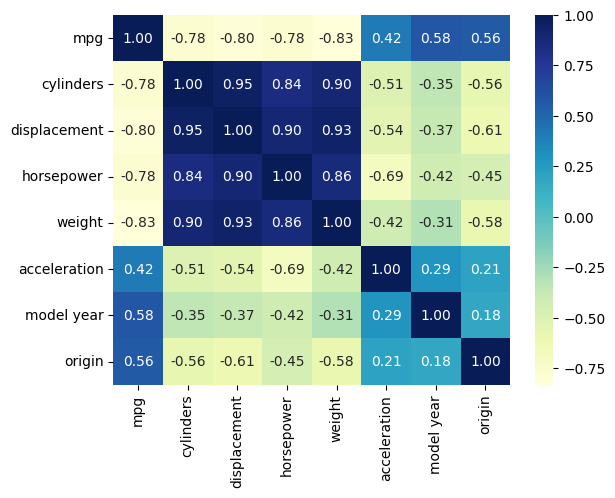

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu') # Visualization using Heatmap

<ipython-input-45-a0393a7beddd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu') # Visualization using Clustermap


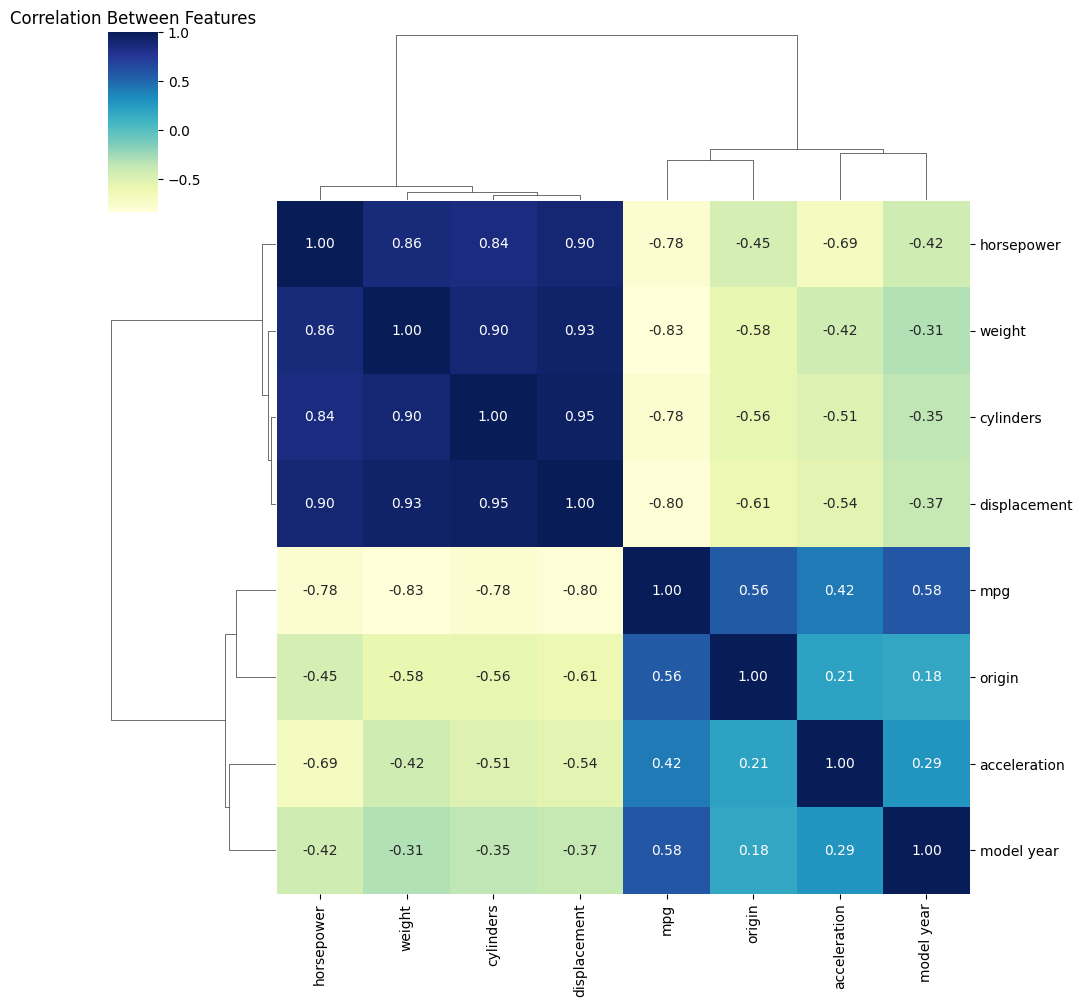

In [ ]:
sns.clustermap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu') # Visualization using Clustermap
plt.title("Correlation Between Features")
plt.show()

Data visualization:

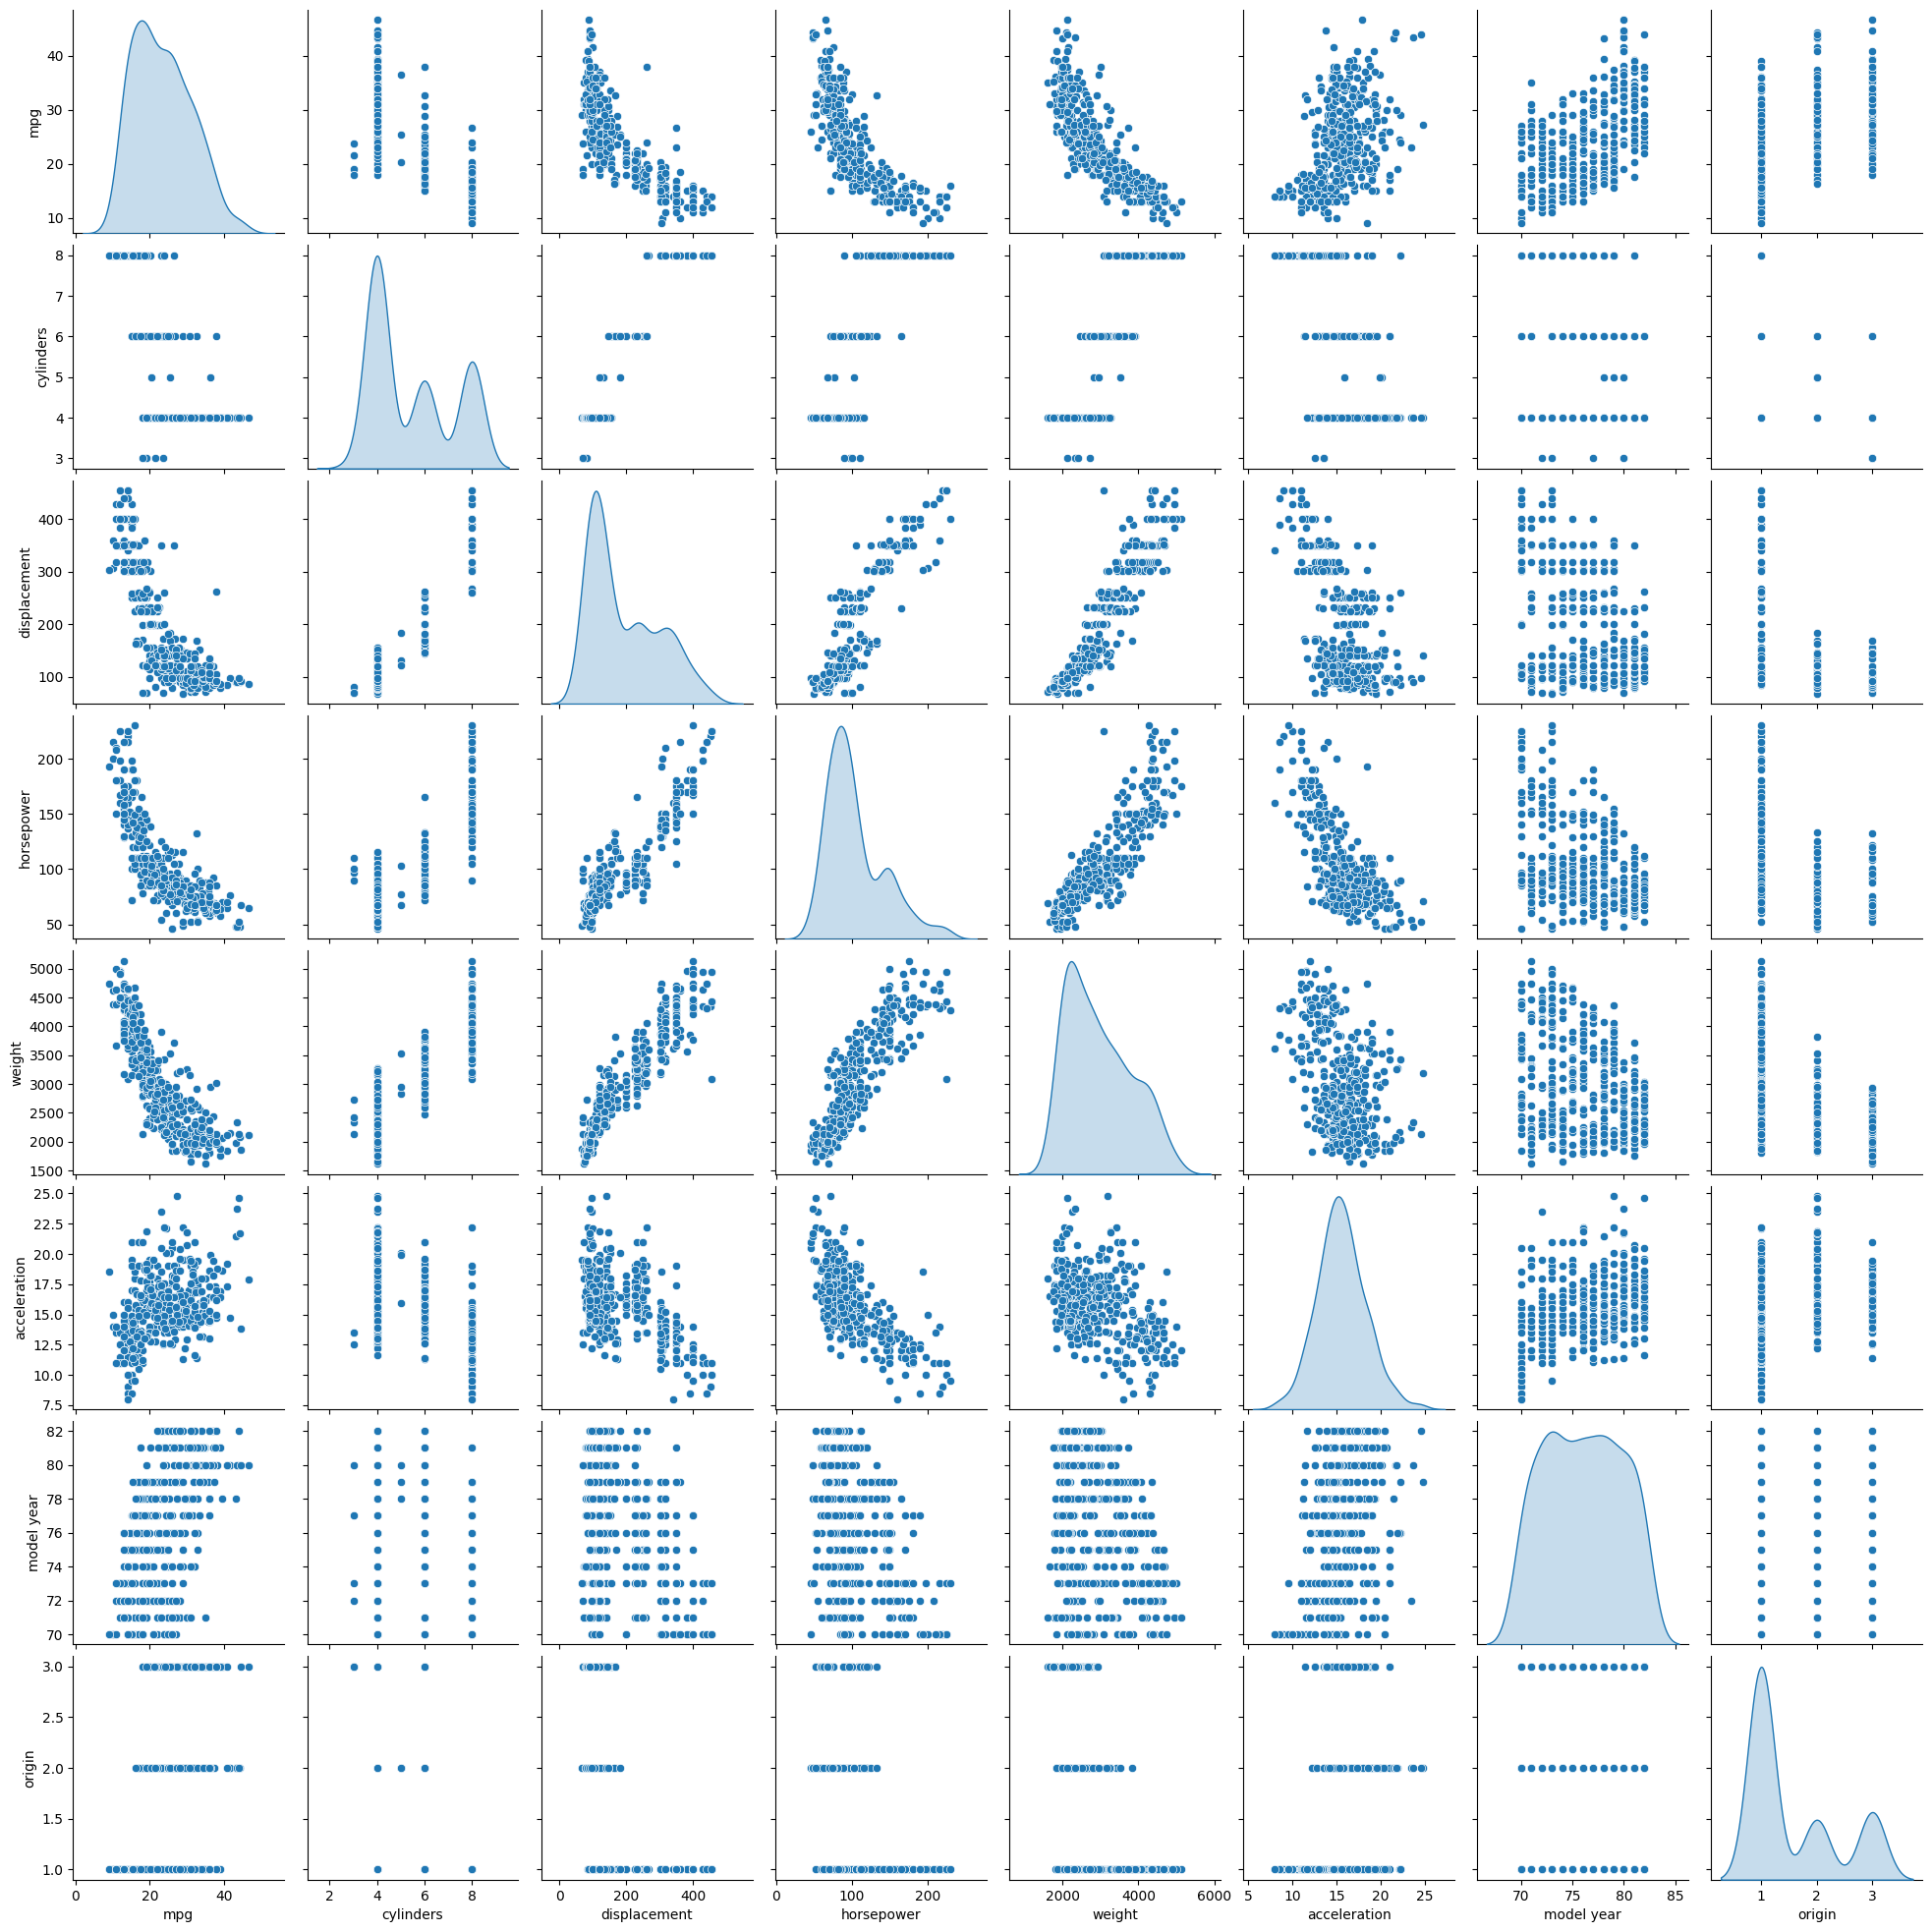

In [ ]:
sns.pairplot(df, diag_kind="kde")

# Note that 'cylinders' and 'origin' are categorical values so the graphs containing these features appear to have datapoints align in straight lines.

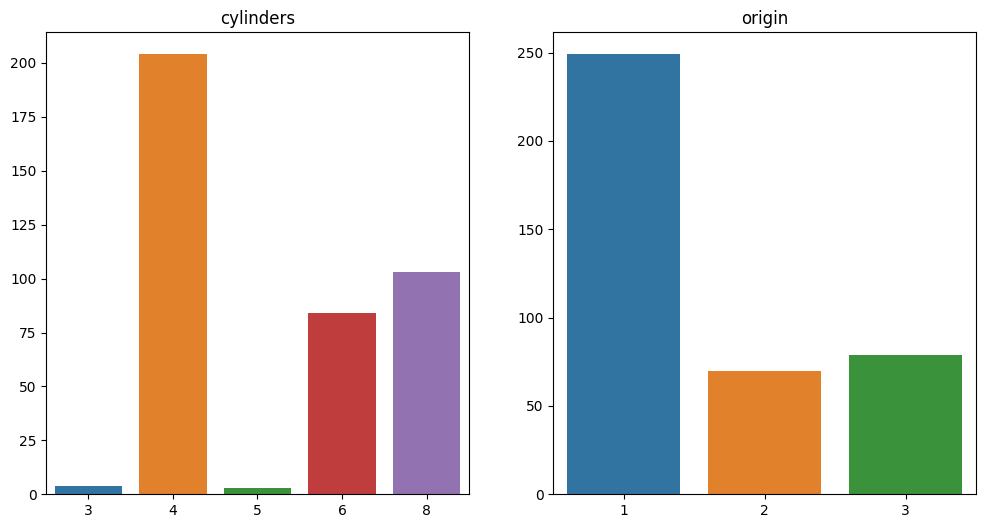

In [ ]:
# Analyze the values of 'cylinders' and 'origin'.
plt.figure(figsize = (12,6))
plt.subplot(121)
sns.barplot(x = df["cylinders"].value_counts().index, y = df["cylinders"].value_counts().values)
plt.title("cylinders")
plt.subplot(122)
sns.barplot(x = df["origin"].value_counts().index, y = df["origin"].value_counts().values)
plt.title("origin")
plt.show()

# Training, testing and evaluating:

In [ ]:
# Our target variable to predict is 'msg', so here we print out its correlation coefficient
# to see the strength and direction of the linear relationship between it and  other features.
df.corr()['mpg']

<ipython-input-48-82f9ac03f764>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mpg']


mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.776840
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [ ]:
# Most features have considerable linear relationship with the 'msg' ( either close to 1 or -1 ). However, 'car name' is irrelevant,
# so we will not use it in our case.
df = df.drop(['car name'], axis = 1) # Drop the 'car name' column from the dataset.
df # Check the dataset after dropping.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


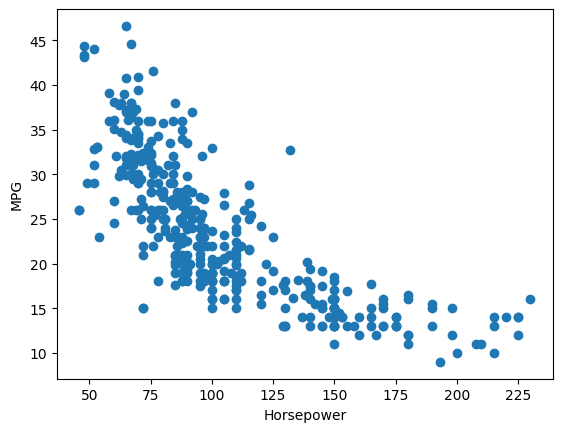

In [ ]:
# Graph visualization of the relationship between the values of a feature and the values of 'mpg'
# For example: horsepower
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [ ]:
# Creating variables: X - inputs from dataset ( 7 features ), y - ouputs (target) from dataset
X = df.drop(['mpg'], axis = 1)
y = df['mpg']

In [ ]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
X_train.shape

(318, 7)

In [ ]:
X_test.shape

(80, 7)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
filename = '/content/drive/MyDrive/Trained models/mpg_prediction.pkl' # Save the trained model to personal Drive for future use
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
predictions = model.predict(X_test)

Evaluating the model's performance with r_quare, mean_absolute_error & mean_squared_error

In [ ]:
r2_score(y_test, predictions)

0.7995474603940725

In [ ]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.595394065518387


In [ ]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mae)

Mean Squared Error: 2.595394065518387
